# **Q1.**

**Consider a two-category (ω1 and ω2) classification problem with equal priors. Each feature is a two- dimensional vector x = (x1, x2)t . The class-conditional densities are:
p(x|ω1) ∼ N(μ1 = (0,0)t,Σ1 = 2I),
p(x|ω2) ∼ N(μ2 = (3,3)t,Σ2 = I)**

**(c) [3 points] Now generate 10, 000 bivariate random patterns from each of the two densities (if you are using matlab, then the mvnrnd function can be used to generate these patterns). Plot these patterns in a graph using different markers to distinguish the two classes. On the same graph, plot the Bayes decision boundary derived earlier.**



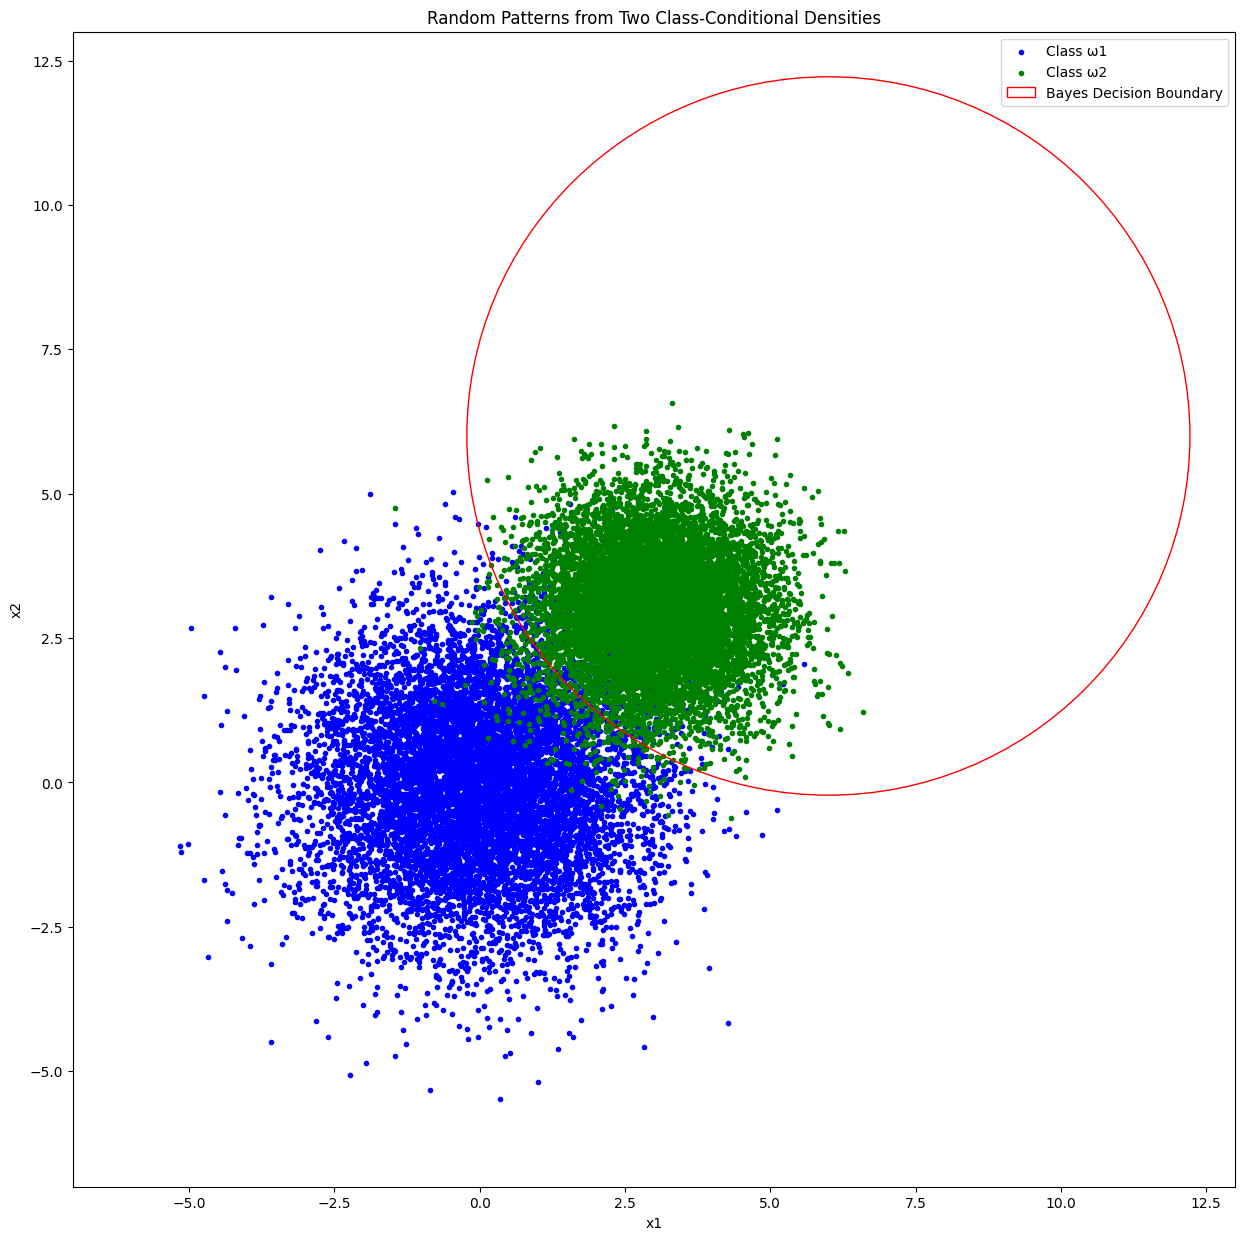

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10000 # Number of samples
mu1 = [0, 0] # Mean of ω1
mu2 = [3, 3] # Mean of ω2
sigma1 = 2 * np.eye(2) # Covariance matrix of ω1
sigma2 = np.eye(2) # Covariance matrix of ω2

# Generate samples
X1 = np.random.multivariate_normal(mu1, sigma1, n)
X2 = np.random.multivariate_normal(mu2, sigma2, n)

# Plot samples
plt.scatter(X1[:, 0], X1[:, 1], c='b', marker='.')
plt.scatter(X2[:, 0], X2[:, 1], c='g', marker='.')
plt.title('Random Patterns from Two Class-Conditional Densities')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Class ω1', 'Class ω2'])

# Plot decision boundary

#x = np.linspace(-4, 7, 100)
#y = 3 - x
#plt.plot(x, y, 'k', linewidth=2)
plt.rcParams["figure.figsize"] = [15.00, 15.00]
circle = plt.Circle((6, 6), 6.22, color='r', fill=False)
plt.gca().add_artist(circle)
plt.legend(['Class ω1', 'Class ω2', 'Bayes Decision Boundary'])
plt.xlim([-7, 13])
plt.ylim([-7, 13])
plt.show()


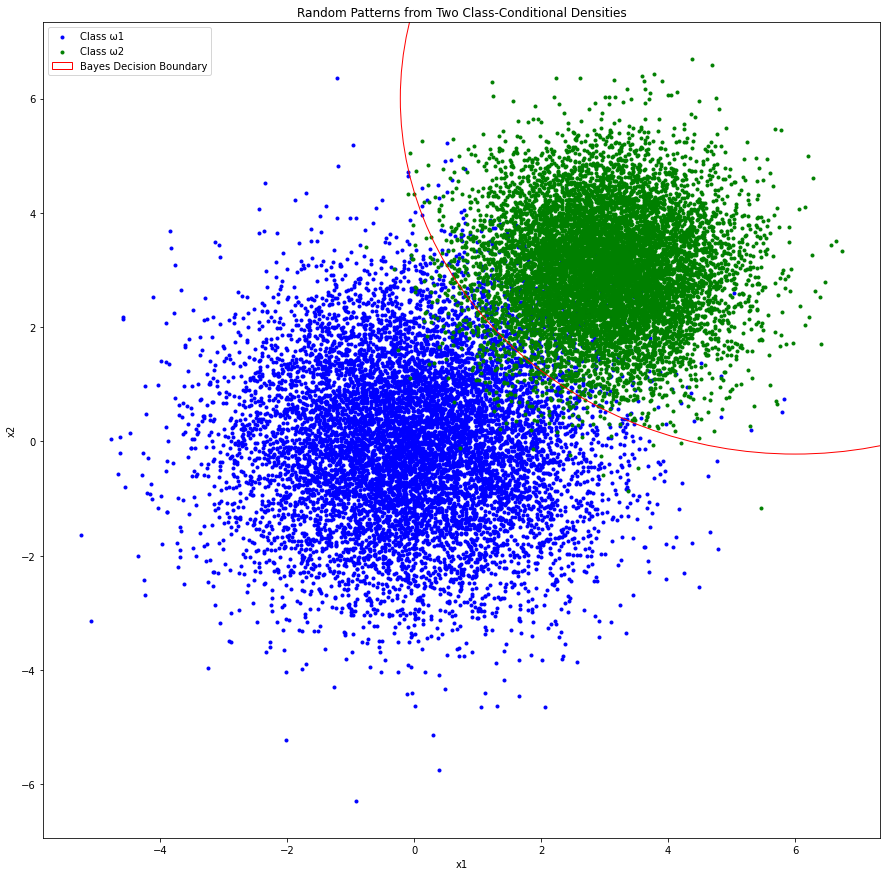

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10000 # Number of samples
mu1 = [0, 0] # Mean of ω1
mu2 = [3, 3] # Mean of ω2
sigma1 = 2 * np.eye(2) # Covariance matrix of ω1
sigma2 = np.eye(2) # Covariance matrix of ω2

# Generate samples
X1 = np.random.multivariate_normal(mu1, sigma1, n)
X2 = np.random.multivariate_normal(mu2, sigma2, n)

# Plot samples
plt.scatter(X1[:, 0], X1[:, 1], c='b', marker='.')
plt.scatter(X2[:, 0], X2[:, 1], c='g', marker='.')
plt.title('Random Patterns from Two Class-Conditional Densities')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Class ω1', 'Class ω2'])

# Plot decision boundary

#x = np.linspace(-4, 7, 100)
#y = 3 - x
#plt.plot(x, y, 'k', linewidth=2)
plt.rcParams["figure.figsize"] = [15.00, 15.00]
circle = plt.Circle((6, 6), 6.22, color='r', fill=False)
plt.gca().add_artist(circle)
plt.legend(['Class ω1', 'Class ω2', 'Bayes Decision Boundary'])
plt.show()


**(c) Chernoff bound**

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

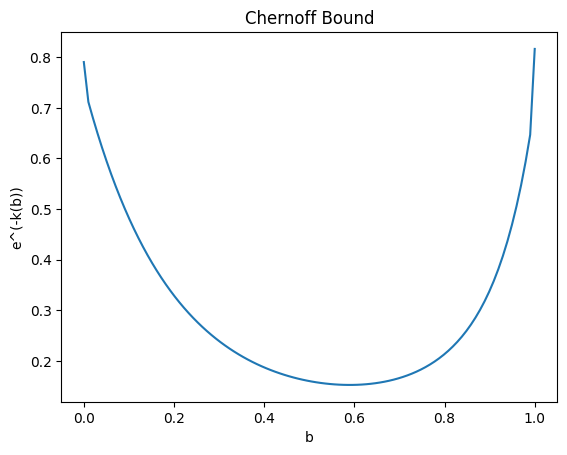

In [25]:
import numpy as np
import matplotlib.pyplot as plt

mu1 = np.array([0, 0])
mu2 = np.array([3, 3])
sigma1 = 2*np.eye(2)
sigma2 = np.eye(2)

def k_function(b):
    inv_sigma = np.linalg.inv((1-b)*sigma1 + b*sigma2)
    det_sigma1 = np.linalg.det(sigma1)
    det_sigma2 = np.linalg.det(sigma2)
    det_term = np.log(np.linalg.det(sigma1**(1-b) + sigma2**b) / ((det_sigma1)**(1-b) + (det_sigma2)**b)) / 2
    return b*(1-b)*np.dot(mu2 - mu1, inv_sigma.dot(mu2 - mu1)) / 2 + det_term

b_values = np.linspace(0, 1, 100)
print(b_values)
k_values = np.array([(-1)*k_function(b) for b in b_values])
print(k_values)

min_k = np.min(k_values)
min_b = b_values[np.argmin(k_values)]
print(np.exp(min_k))
print(min_b)
plt.plot(b_values, np.exp(k_values))
plt.xlabel('b')
plt.ylabel('e^(-k(b))')
plt.title('Chernoff Bound')
plt.show()


**(d) [5points] Write a program to compute and report the empirical error rate and the confusion matrix when classifying these 10, 000 patterns using the Bayes decision rule derived earlier.**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10000 # Number of samples
mu1 = [0, 0] # Mean of ω1
mu2 = [3, 3] # Mean of ω2
sigma1 = 2 * np.eye(2) # Covariance matrix of ω1
sigma2 = np.eye(2) # Covariance matrix of ω2

# Generate samples
X1 = np.random.multivariate_normal(mu1, sigma1, n)
X2 = np.random.multivariate_normal(mu2, sigma2, n)

X1_total = len(X1)
X1_err = 0

for i in range(X1_total):
  if (X1[i][0] - 6)*(X1[i][0] - 6) + (X1[i][1] - 6)*(X1[i][1] - 6) <= 38.688: #should be classified as w2 True Value w2
    X1_err += 1 #Predicted value w1

x1_true_pred = X1_total - X1_err
X1_empirical_err_rate = X1_err/X1_total
#print(X1_empirical_err_rate)

X2_total = len(X2)
X2_err = 0

for i in range(X2_total):
  if (X2[i][0] - 6)*(X2[i][0] - 6) + (X2[i][1] - 6)*(X2[i][1] - 6) > 38.688: #should be classified as w1 True value w1
    X2_err += 1 #Predicted value w2

x2_true_pred = X2_total - X2_err
X2_empirical_err_rate = X2_err/X2_total
#print(X2_empirical_err_rate)

err_rate = (X1_empirical_err_rate + X2_empirical_err_rate)/2

print("Empirical error rate: ", err_rate)

confusion_matrix = [[x1_true_pred, X2_err], 
                    [X1_err, x2_true_pred]]

print("Confusion Matrix: ")
for s in confusion_matrix:
    print(*s)

Empirical error rate:  0.0375
Confusion Matrix: 
9565 315
435 9685


# **Q2.**

**(a) Compute and report the whitening transform, Aw , of x ?**

In [ ]:
import numpy as np

# Define the mean and covariance matrix of the distribution
mean = np.array([0, 0])
cov = np.array([[20, 10], [10, 30]])

# Compute the eigenvectors and eigenvalues of the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov)

# Construct the whitening matrix
whitening_matrix = np.dot(np.diag(1.0/np.sqrt(eig_vals)), eig_vecs.T)

# Apply the whitening matrix to the original data
x = np.random.multivariate_normal(mean, cov, size=100)  # example data
x_whitened = np.dot(whitening_matrix, x.T).T

# Print the whitening matrix
print("Whitening matrix:\n", whitening_matrix)

# Print the first 5 rows of the original and whitened data
print("Original data:\n", x[:5, :])
print("Whitened data:\n", x_whitened[:5, :])


Whitening matrix:
 [[-0.22882456  0.14142136]
 [-0.0874032  -0.14142136]]
Original data:
 [[-6.93719266 -7.6356387 ]
 [-1.16050173 -5.82162427]
 [ 3.77238297  5.93161904]
 [-1.33705629  8.89228675]
 [-0.64522229 -9.85115554]]
Whitened data:
 [[ 0.50755769  1.68617525]
 [-0.5577507   0.92473357]
 [-0.02435627 -1.16857597]
 [ 1.56351057 -1.14069625]
 [-1.24552107  1.44955827]]


**(c) Generate 10,000 bivariate random patterns from p original, Plot these patterns in a graph.**

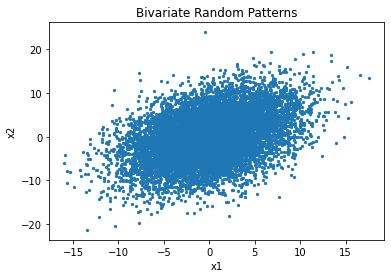

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean and covariance matrix of the distribution
mean = np.array([0, 0])
cov = np.array([[20, 10], [10, 30]])

# Generate 10,000 random patterns from the distribution
patterns = np.random.multivariate_normal(mean, cov, size=10000)

# Plot the patterns in a scatter plot
plt.scatter(patterns[:,0], patterns[:,1], s=5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Bivariate Random Patterns')
plt.show()


**(d) Apply the whitening transform, Aw , to the 10, 000 bivariate patterns generated above. Plot the transformed patterns in a separate graph.**

DOUBT: what do you mean by scale across two axis remain same

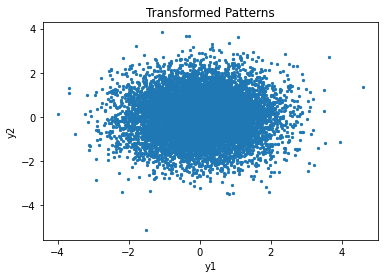

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the mean and covariance matrix of the distribution
mean = np.array([0, 0])
cov = np.array([[20, 10], [10, 30]])

# Generate 10,000 random patterns from the distribution
patterns = np.random.multivariate_normal(mean, cov, size=10000)

# Compute the whitening matrix
eigvals, eigvecs = np.linalg.eig(cov)
Lambda = np.diag(eigvals)
V = eigvecs
Aw = V @ np.linalg.inv(np.sqrt(Lambda)) @ V.T

# Apply the whitening transform to the patterns
patterns_transformed = Aw @ patterns.T
patterns_transformed = patterns_transformed.T

# Plot the transformed patterns in a scatter plot
plt.scatter(patterns_transformed[:,0], patterns_transformed[:,1], s=5)
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('Transformed Patterns')
plt.show()


# **Q4.**

**Consider a two-category classification problem involving two-dimensional feature vectors of the form
x = (x1, x2)t . The two categories are ω1 and ω2, and
p(x |ω1)∼N􏰀(4,4)t,I􏰁,
p(x |ω2)∼N􏰀(0,0)t,I􏰁, P ( ω 1 ) = P ( ω 2 ) = 12**

**(b) Chernoff bound**

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

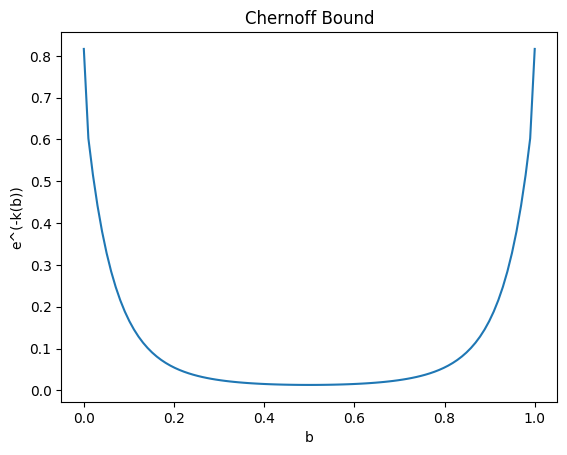

In [26]:
import numpy as np
import matplotlib.pyplot as plt

mu1 = np.array([4, 4])
mu2 = np.array([0, 0])
sigma1 = np.eye(2)
sigma2 = np.eye(2)

def k_function(b):
    inv_sigma = np.linalg.inv((1-b)*sigma1 + b*sigma2)
    det_sigma1 = np.linalg.det(sigma1)
    det_sigma2 = np.linalg.det(sigma2)
    det_term = np.log(np.linalg.det(sigma1**(1-b) + sigma2**b) / ((det_sigma1)**(1-b) + (det_sigma2)**b)) / 2
    return b*(1-b)*np.dot(mu2 - mu1, inv_sigma.dot(mu2 - mu1)) / 2 + det_term

b_values = np.linspace(0, 1, 100)
print(b_values)
k_values = np.array([(-1)*k_function(b) for b in b_values])
print(k_values)

min_k = np.min(k_values)
min_b = b_values[np.argmin(k_values)]
print(np.exp(min_k))
print(min_b)
plt.plot(b_values, np.exp(k_values))
plt.xlabel('b')
plt.ylabel('e^(-k(b))')
plt.title('Chernoff Bound')
plt.show()


**(c)  Generate n = 25 test patterns from each of the two class-conditional densities and plot them in a two-dimensional feature space using different markers for the two categories (if you are using matlab, then the mvnrnd function can be used to generate these patterns). Draw the Bayes decision boundary on this plot for visualization purposes.**

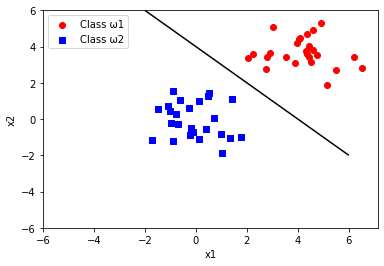

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the class-conditional densities
mu_1 = np.array([4, 4])
mu_2 = np.array([0, 0])
sigma = np.eye(2)

# Generate test patterns
n = 25
X1 = np.random.multivariate_normal(mu_1, sigma, n)
X2 = np.random.multivariate_normal(mu_2, sigma, n)

# Plot the test patterns
plt.scatter(X1[:,0], X1[:,1], c='red', marker='o', label='Class ω1')
plt.scatter(X2[:,0], X2[:,1], c='blue', marker='s', label='Class ω2')

# Plot the Bayes decision boundary
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = (X - mu_1[0])**2 + (Y - mu_1[1])**2 - (X - mu_2[0])**2 - (Y - mu_2[1])**2
plt.contour(X, Y, Z, levels=[0], colors='black')

# Add labels and legend
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# Show the plot
plt.show()


**(d) What is the confusion matrix and empirical error rate when classifying the 
generated patterns using the Bayes decision rule?**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 25 # Number of samples
mu1 = [4, 4] # Mean of ω1
mu2 = [0, 0] # Mean of ω2
sigma1 = np.eye(2) # Covariance matrix of ω1
sigma2 = np.eye(2) # Covariance matrix of ω2

# Generate samples
X1 = np.random.multivariate_normal(mu1, sigma1, n)
X2 = np.random.multivariate_normal(mu2, sigma2, n)

X1_total = len(X1)
X1_err = 0

for i in range(X1_total):
  if X1[i][0] + X1[i][1] <= 2: #should be classified as w2 True Value w2
    X1_err += 1 #Predicted value w1

x1_true_pred = X1_total - X1_err
X1_empirical_err_rate = X1_err/X1_total
#print(X1_empirical_err_rate)

X2_total = len(X2)
X2_err = 0

for i in range(X2_total):
  if X2[i][0] + X2[i][1] > 2: #should be classified as w1 True value w1
    X2_err += 1 #Predicted value w2

x2_true_pred = X2_total - X2_err
X2_empirical_err_rate = X2_err/X2_total
#print(X2_empirical_err_rate)

err_rate = (X1_empirical_err_rate + X2_empirical_err_rate)/2

print("Empirical error rate: ", err_rate)

confusion_matrix = [[x1_true_pred, X2_err], 
                    [X1_err, x2_true_pred]]

print("Confusion Matrix: ")
for s in confusion_matrix:
    print(*s)

Empirical error rate:  0.06
Confusion Matrix: 
25 3
0 22


#**Q5.**

Consider a set of 1000 training patterns that can be accessed here. Plot the normalized
histogram of the training patterns. In the same graph, plot the distribution, p(x), after estimating
θ􏰉 from these training patterns. Also, report the θ􏰉 value.

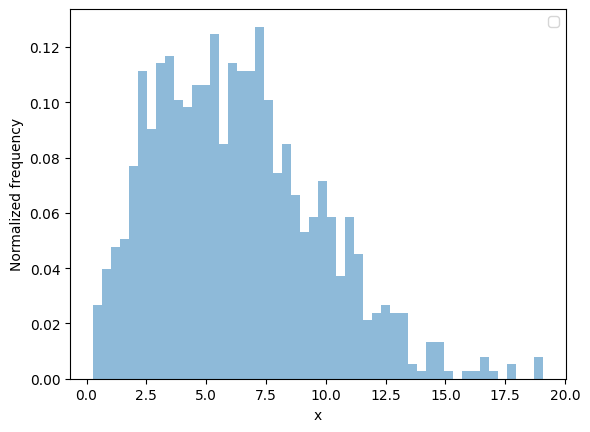

Estimated theta: 25.6529


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = np.loadtxt("http://www.cse.msu.edu/~rossarun/courses/sp23/cse802/data/hw3_random_data_q1.txt")

# Calculate theta
theta_hat = np.sum(data**2)/(2*len(data))


# Define the Rayleigh distribution
def rayleigh(x, theta):
    return 2*theta*x*np.exp(-theta*x**2)

# Create a range of x values for the plot
x = np.linspace(0, 5, 100)

# Plot the histogram
plt.hist(data, bins=50, density=True, alpha=0.5)

# Plot the Rayleigh distribution

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Normalized frequency')
plt.legend()

# Show the plot
plt.show()

# Print the estimated theta
print("Estimated theta: {:.4f}".format(theta_hat))


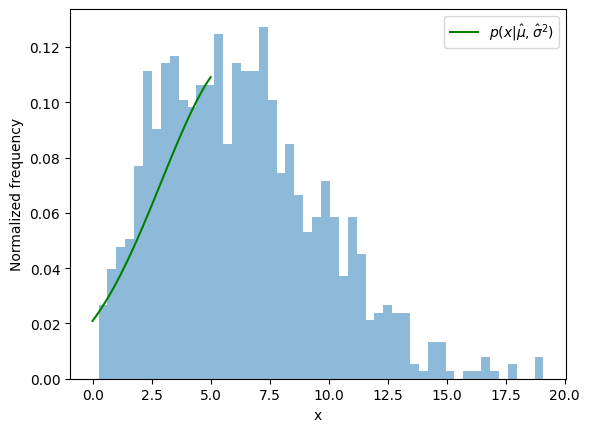

Estimated mean: 6.3072
Estimated variance: 11.5252


In [28]:
# Calculate the mean and variance
mean = np.mean(data)
variance = np.var(data)

# Define the Gaussian distribution
def gaussian(x, mean, variance):
    return 1/np.sqrt(2*np.pi*variance)*np.exp(-(x-mean)**2/(2*variance))

# Plot the histogram and the Rayleigh and Gaussian distributions
plt.hist(data, bins=50, density=True, alpha=0.5)
plt.plot(x, gaussian(x, mean, variance), 'g-', label=r'$p(x|\hat{\mu},\hat{\sigma}^2)$')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Normalized frequency')
plt.legend()

# Show the plot
plt.show()

# Print the estimated mean and variance
print("Estimated mean: {:.4f}".format(mean))
print("Estimated variance: {:.4f}".format(variance))
